<H2>Customer Lifetime prediction value </H2>

# Import the necessary libraries and data

In [45]:
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [3]:
def read_data(file_path):
    """Reads the excel file and returns a dataframe."""
    return pd.read_excel(file_path)

data = read_data("/content/Online Retail.xlsx")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Data Preparation

In [7]:
def process_data(df):
    """Processes invoice dates and adds an 'InvoiceYearMonth' column."""
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100 * date.year + date.month)
    return df

In [8]:
data = process_data(data)

In [9]:
data['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


* Starting from this part, we will be focusing on UK data only (which has the most records).

In [10]:
#Filters the data for customers from the United Kingdom.
def filter_uk_data(df):
    return df.query("Country=='United Kingdom'").reset_index(drop=True)

In [11]:
data_uk = filter_uk_data(data)

**Segmentation Techniques**

To improve retention, segmentation can be based on churn probability or other metrics. A common approach is **RFM** (Recency, Frequency, Monetary Value), which categorizes customers as follows:

- **Low Value**: Infrequent users, low or negative revenue.
- **Mid Value**: Moderate engagement, frequency, and revenue.
- **High Value**: Highly active, frequent buyers with high revenue.

We'll calculate RFM and use unsupervised learning to segment customers accordingly.

<h3><a href=3>Recency</a></h3>

To calculate **recency**, we find each customer's most recent purchase date and check how many days they've been inactive. Then, using **K-Means clustering**, we group customers based on their inactivity period and assign them a **recency score**.

Since we are calculating recency, we need to know when last the person bought something. Let us calculate the last date of transaction for a person.

In [12]:
def compute_recency(df):
    """Calculates recency for each customer based on their last purchase date."""
    data_max_purchase = df.groupby('CustomerID').InvoiceDate.max().reset_index()
    data_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
    data_max_purchase['Recency'] = (data_max_purchase['MaxPurchaseDate'].max() - data_max_purchase['MaxPurchaseDate']).dt.days
    return data_max_purchase[['CustomerID', 'Recency']]

In [13]:
# Calculate Recency
recency_data = compute_recency(data_uk)
recency_data

,CustomerID,Recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2
...,...,...
3945,18280.0,277
3946,18281.0,180
3947,18282.0,7
3948,18283.0,3


<a href=3.1><h3>Assigning a recency score</h3></a>

We are going to apply K-means clustering to assign a recency score. But we should tell how many clusters we need to K-means algorithm. To find it out, we will apply Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia. Code snippet and Inertia graph are as follows:

In [14]:
def plot_elbow_curve(data, feature_name, max_clusters=10):
    """Generates an elbow plot to determine the optimal number of clusters."""
    sse = {}
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data[[feature_name]])
        sse[k] = kmeans.inertia_

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(list(sse.keys()), list(sse.values()), marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title(f"Elbow Method for {feature_name} Clustering")
    plt.show()

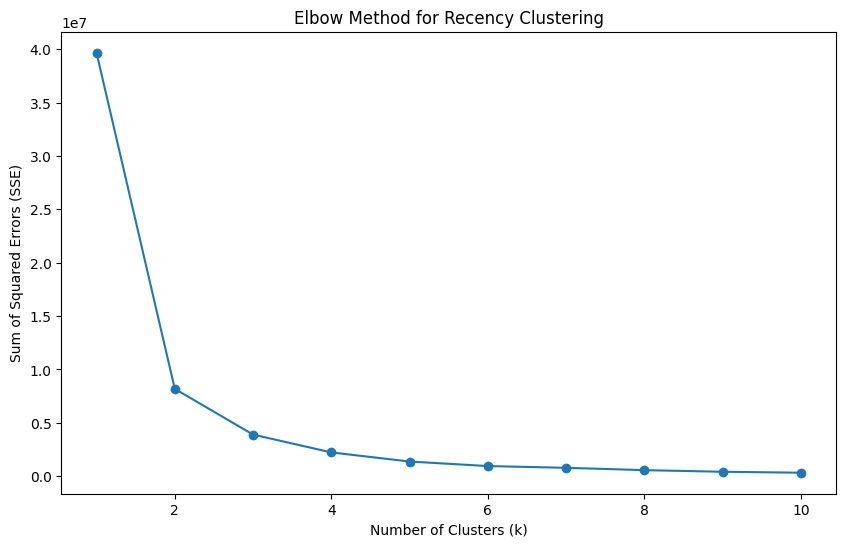

In [15]:
plot_elbow_curve(recency_data,'Recency')

Here it looks like 4 clusters is the optimal one.

In [16]:
def cluster_data(df, field, n_clusters):
    """Applies K-Means clustering to a given field and returns the labeled clusters."""
    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{field}Cluster'] = kmeans.fit_predict(df[[field]])
    return df


In [17]:
# Cluster Recency
recency_data = cluster_data(recency_data, 'Recency', 4)
recency_data.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,450.0,307.997778,39.742349,250.0,273.0,303.0,351.0,373.0
1,2055.0,19.135766,14.722310,0.0,7.0,17.0,30.0,51.0
2,561.0,190.843137,31.871455,138.0,164.0,189.0,217.0,249.0
3,884.0,83.245475,23.818627,52.0,63.0,77.0,100.0,137.0


<a href=3.2><h3>Ordering clusters</a></h3>

We have a cluster corresponding to each customerID. But each cluster is randomly assigned. Cluster 2 is not better than cluster 1 for e.g. and so on. We want to give clusters according to most recent transactions.

We will first find the mean of recency value corresponding to each cluster. Then we will sort these values. Let's say cluster 3 has the most recent transactions mean value. From the above table we see that cluster 1(mean recency 304) > cluster 2 > cluster 3 > cluster 0. That means that cluster 1 is most inactive and cluster 0 is most recent. We will give indices to these clusters as 0,1,2,3. So cluster 1 becomes cluster 0, cluster 2 becomes cluster 1, cluster 3 becomes cluster 2 and so on. Now we will drop the original cluster numbers and replace them with 0,1,2,3. Code is below.

In [18]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Re-orders clusters based on the target field."""
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df = df.drop([cluster_field_name], axis=1)
    df = df.rename(columns={"index": cluster_field_name})
    return df

In [19]:
# Order Recency Clusters
recency_data = order_cluster('RecencyCluster', 'Recency', recency_data, False)

Great! cluster 1 earlier is now cluster0, cluster 2 earlier is now cluster 1 and so on. The clusters are arranged according to inactiviuty. Cluster 0 now is most inactive, cluster 3 is most active.

<h3><a href=4>Frequency </a></h3>

* To create frequency clusters, we need to find total number orders for each customer.

In [20]:
def compute_frequency(df):
    """Calculates frequency for each customer."""
    frequency_data = df.groupby('CustomerID').InvoiceDate.count().reset_index()
    frequency_data.columns = ['CustomerID', 'Frequency']
    return frequency_data

In [21]:
# Calculate Frequency
frequency_data = compute_frequency(data_uk)
frequency_data.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59


<a href=4.1><h3>4.1 Frequency clusters</h3></a>

Determine the right number of clusters for K-Means by elbow method

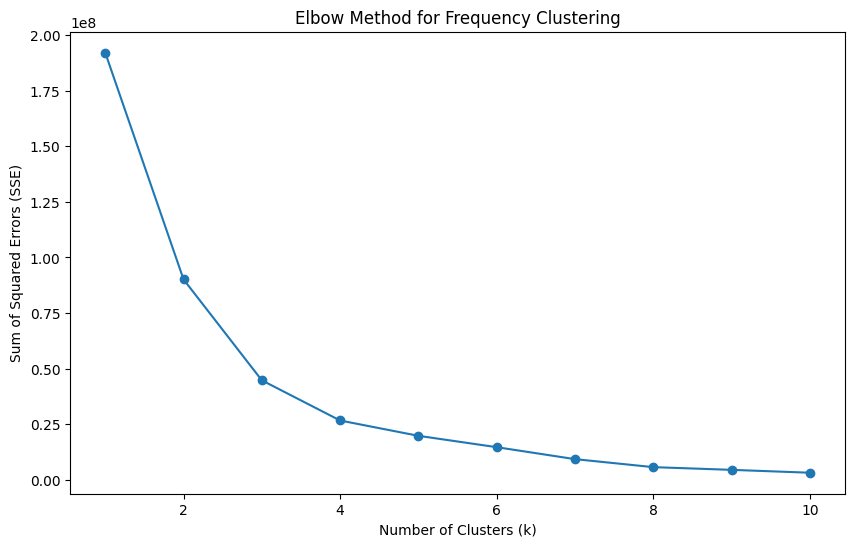

In [22]:
plot_elbow_curve(frequency_data,'Frequency')

* from the above plot it is optimal to choose 5 clusters but for analysis we choose 4

In [23]:
# Cluster Frequency
frequency_data = cluster_data(frequency_data, 'Frequency', 4)
frequency_data.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,425.0,332.541176,133.788498,192.0,228.0,291.0,399.0,803.0
1,3500.0,49.687429,45.182138,1.0,15.0,33.0,73.0,191.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


In [24]:
# Order Frequency Clusters
frequency_data = order_cluster('FrequencyCluster', 'Frequency', frequency_data, True)

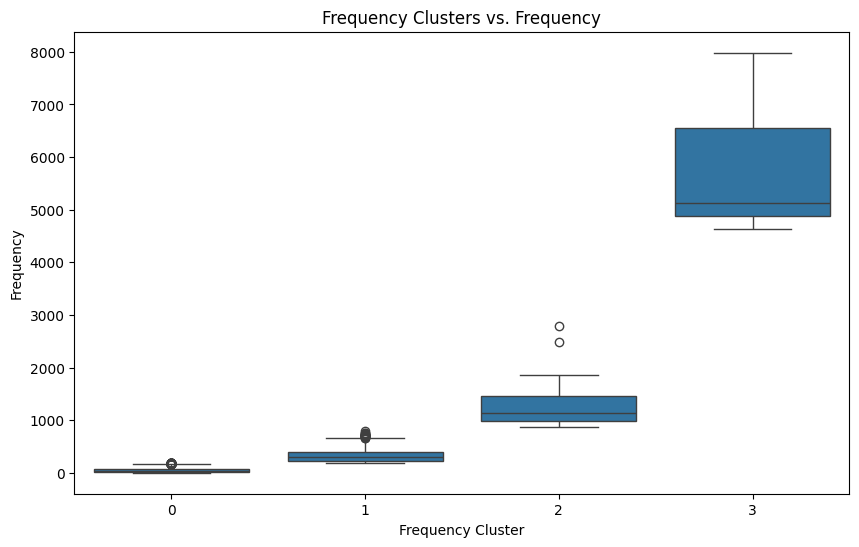

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FrequencyCluster', y='Frequency', data=frequency_data)
plt.xlabel('Frequency Cluster')
plt.ylabel('Frequency')
plt.title('Frequency Clusters vs. Frequency')
plt.show()


* we ordered the cluster in increasing order
* we find  that more number of data points in cluster 2
* there are some outliers in cluster 1

In [26]:
frequency_data.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12748.0,4642,3
3,12749.0,231,1
4,12820.0,59,0


<a href=5><h3>5. Revenue</h3></a>

Let’s see how our customer database looks like when we cluster them based on revenue. We will calculate revenue for each customer, plot a histogram and apply the same clustering method.

In [27]:
def compute_revenue(df):
    """Calculates revenue for each customer based on unit price and quantity."""
    df['Revenue'] = df['UnitPrice'] * df['Quantity']
    revenue_data = df.groupby('CustomerID').Revenue.sum().reset_index()
    return revenue_data


In [28]:
# Calculate Revenue
revenue_data = compute_revenue(data_uk)

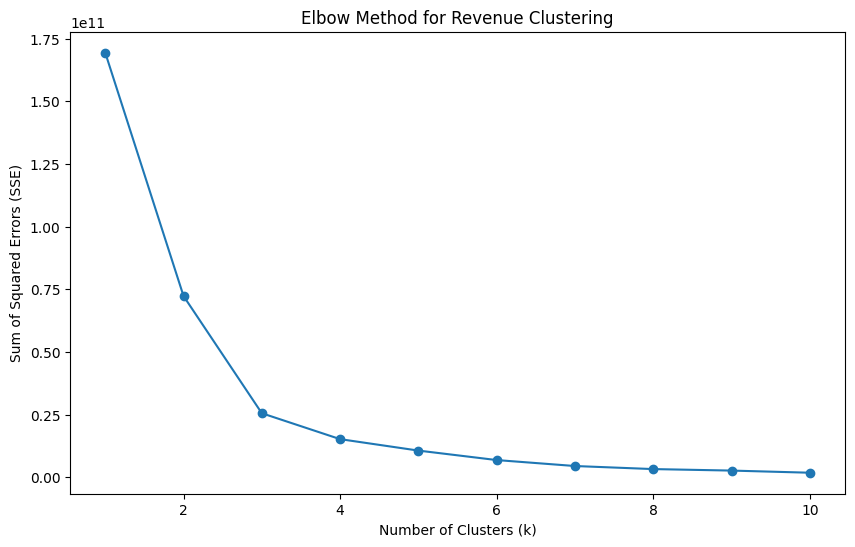

In [29]:
plot_elbow_curve(revenue_data,'Revenue')

* from the above plot 4 clusters are optimal one

In [30]:
# Cluster Revenue
revenue_data = cluster_data(revenue_data, 'Revenue', 4)
revenue_data.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90


In [31]:
# Order Revenue Clusters
revenue_data_data = order_cluster('RevenueCluster', 'Revenue', revenue_data, True)

In [32]:
revenue_data.head()

,CustomerID,Revenue,RevenueCluster
0,12346.0,0.00,0
1,12747.0,4196.01,0
2,12748.0,29072.10,2
3,12749.0,3868.20,0
4,12820.0,942.34,0


In [33]:
# Merging Recency, Frequency, and Revenue
data_user = pd.DataFrame(data_uk['CustomerID'].unique())
data_user.columns = ['CustomerID']

data_user = pd.merge(data_user, recency_data[['CustomerID', 'Recency', 'RecencyCluster']], on='CustomerID')
data_user = pd.merge(data_user, frequency_data[['CustomerID', 'Frequency', 'FrequencyCluster']], on='CustomerID')
data_user = pd.merge(data_user, revenue_data[['CustomerID', 'Revenue', 'RevenueCluster']], on='CustomerID')

data_user.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,1,5288.63,3
1,13047.0,31,3,196,1,3079.10,0
2,13748.0,95,2,28,0,948.25,0
3,15100.0,329,0,6,0,635.10,0
4,15291.0,25,3,109,0,4596.51,3


In [34]:
# Overall Score Calculation
data_user['OverallScore'] = data_user['RecencyCluster'] + data_user['FrequencyCluster'] + data_user['RevenueCluster']

# Assigning Segment Labels
data_user['Segment'] = 'Low-Value'
data_user.loc[data_user['OverallScore'] > 2, 'Segment'] = 'Mid-Value'
data_user.loc[data_user['OverallScore'] > 5, 'Segment'] = 'High-Value'

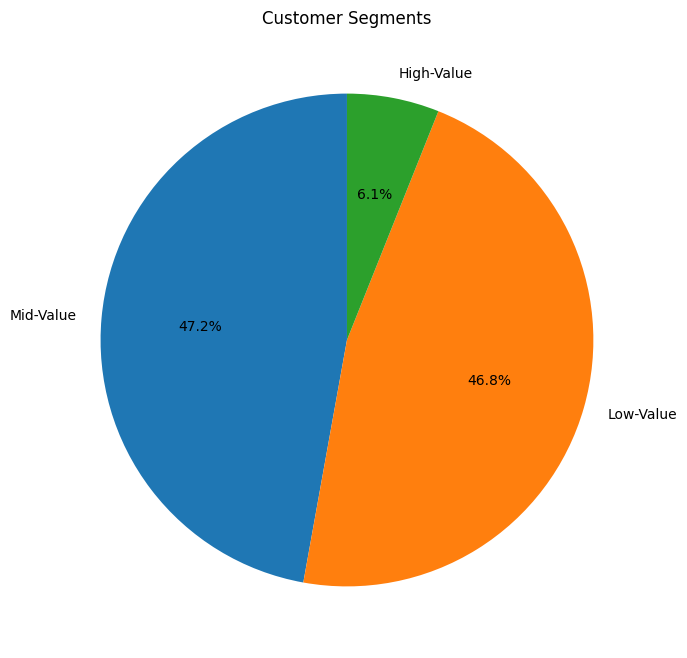

In [35]:
import matplotlib.pyplot as plt

segment_counts = data_user['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segments')
plt.show()


* from this plot it is identical that most of people have either mid value or low value
* only some are with high value

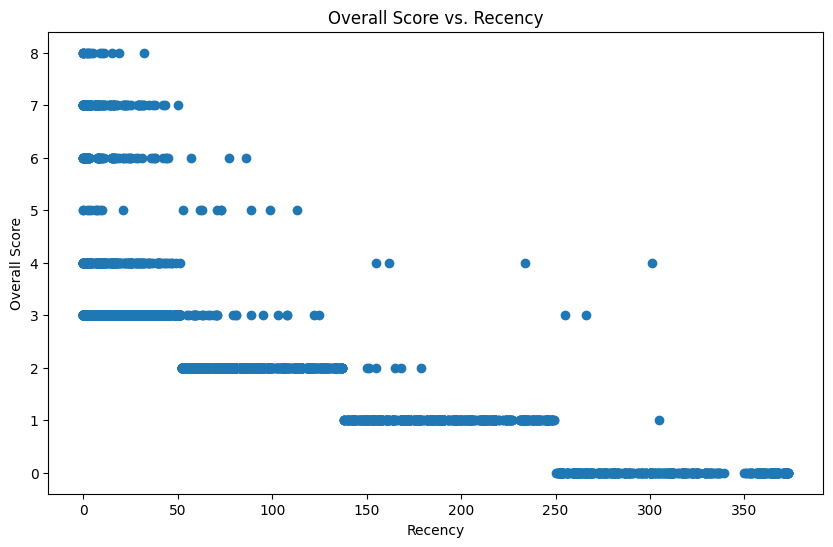

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_user['Recency'], data_user['OverallScore'])
plt.xlabel('Recency')
plt.ylabel('Overall Score')
plt.title('Overall Score vs. Recency')
plt.show()


* from the above plot it is identical that as recency increases the overall score is low

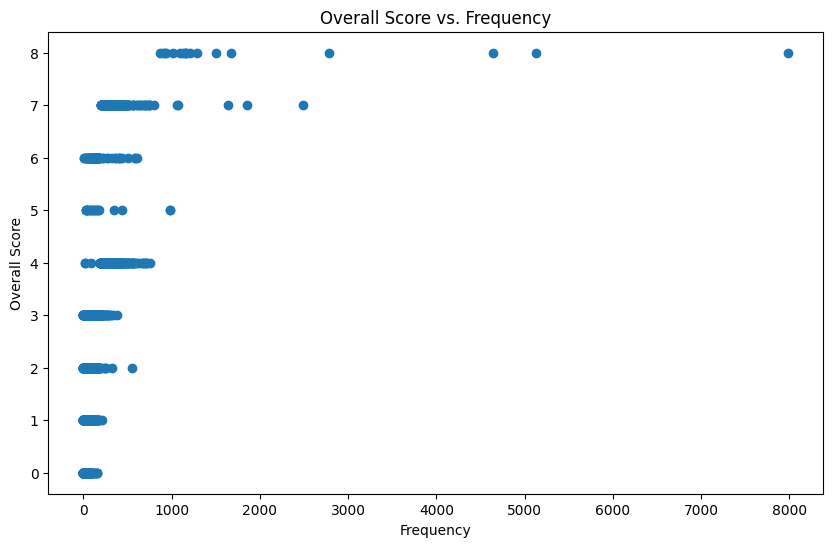

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_user['Frequency'], data_user['OverallScore'])
plt.xlabel('Frequency')
plt.ylabel('Overall Score')
plt.title('Overall Score vs. Frequency')
plt.show()


from the plot it is identical that most of them have overall between 4 to 8 and frequency between 5000 to 15000

In [38]:
data_user.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,308.233184,22.051570,301.159417
1,191.408680,31.980108,462.109821
2,84.161366,45.327444,804.568565
3,22.467040,67.352612,1056.897146
4,17.787234,309.953191,2626.375872
5,38.250000,212.050000,38638.824500
6,15.644737,171.328947,12930.095526
7,9.820690,420.082759,9487.633517
8,6.444444,2031.055556,13726.183333


In [39]:
data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,0,312,1,5288.63,3,4,Mid-Value
1,13047.0,31,3,196,1,3079.10,0,4,Mid-Value
2,13748.0,95,2,28,0,948.25,0,2,Low-Value
3,15100.0,329,0,6,0,635.10,0,0,Low-Value
4,15291.0,25,3,109,0,4596.51,3,6,High-Value
...,...,...,...,...,...,...,...,...,...
3945,15471.0,1,3,77,0,469.48,0,3,Mid-Value
3946,13436.0,1,3,12,0,196.89,0,3,Mid-Value
3947,15520.0,1,3,18,0,343.50,0,3,Mid-Value
3948,13298.0,0,3,2,0,360.00,0,3,Mid-Value


# Split the data

In [40]:
# Prepare features and target for CLV prediction
X = data_user[['Recency', 'Frequency', 'RecencyCluster', 'FrequencyCluster', 'OverallScore']]
y = data_user['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Model

In [41]:
def run_all_models(X_train, X_test, y_train):

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'AdaBoost': AdaBoostRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }

    predictions = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)
        predictions[model_name] = model.predict(X_test)

    return predictions, models


# Evaluate the Model

In [42]:
def calculate_metrics(y_test, predictions):

    results = []

    for model_name, y_pred in predictions.items():
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2 = r2_score(y_test, y_pred)


        results.append({
            'Model': model_name,
            'RMSE': rmse,
            'R-Squared': r2
        })
    metrics_df = pd.DataFrame(results)
    return metrics_df

In [49]:
predictions, models = run_all_models(X_train, X_test, y_train)
metrics_df = calculate_metrics(y_test, predictions)
metrics_df

Training Linear Regression...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training XGBoost...


,Model,RMSE,R-Squared
0,Linear Regression,4161.457099,0.374020
1,Random Forest,4989.660422,0.100064
2,AdaBoost,4135.291091,0.381867
3,Gradient Boosting,3965.844336,0.431486
4,XGBoost,6130.378134,-0.358452


**from this it known that adaboost regressor is the best model**

In [48]:
# Define the parameter grid for AdaBoostRegressor
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'] # Updated loss values
}

# Create an AdaBoostRegressor model
adaboost_model = GradientBoostingRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['r2', 'neg_root_mean_squared_error'],  # Metrics to optimize
    refit='r2',  # Use R-squared for refitting the best model
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best R-squared score: ", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test set RMSE:", rmse)
print("Test set R-squared:", r2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'learning_rate': 1.0, 'loss': 'absolute_error', 'n_estimators': 82}
Best R-squared score:  0.36408696740218444
Test set RMSE: 3658.179405928828
Test set R-squared: 0.5162735900121025


In [52]:
import pickle
with open('customer_lifetime_value_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


# Deploy the Model

In [44]:
import gradio as gr


ada_boost_model = models['AdaBoost']

def predict_clv(recency, frequency, recency_cluster, frequency_cluster, overall_score):
  """Predicts CLV using the AdaBoost model."""
  input_data = [[recency, frequency, recency_cluster, frequency_cluster, overall_score]]
  clv = ada_boost_model.predict(input_data)[0]
  return clv

iface = gr.Interface(
    fn=predict_clv,
    inputs=[
        gr.Number(label="Recency"),
        gr.Number(label="Frequency"),
        gr.Number(label="Recency Cluster"),
        gr.Number(label="Frequency Cluster"),
        gr.Number(label="Overall Score")
    ],
    outputs=gr.Number(label="Predicted CLV"),
    title="Customer Lifetime Value Prediction",
    description="Enter customer data to predict their lifetime value."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://83abe547f7da4db3a5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
